In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data_path = "/content/drive/My Drive/FinalProject/FinalProject_CodeBase/data/"
dnn_path = "/content/drive/My Drive/FinalProject/FinalProject_CodeBase/dnn/"

In [ ]:
import pandas as pd
import io
import os
import requests
import numpy as np
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt

filepath = os.path.join(data_path, "Raw_data.csv")
df_processed = pd.read_csv(filepath, na_values=['NA','?','-'])
df_processed

,AGE,SEX,BMI,OPEN_LAP,DM,TUMOR.SIZE,AFP,RAS,WBC,HB,PLT,CR,ALB,AST,ALT,GLU,CHOLESTEROL,CRYSTALLOID,PRBC,DURATION.OF.SURG,KDIGO
0,64,0,23.3,0,0,1.200000,193.00000,0,4.1,12.9,113,0.70,3.7,36,35,128,197,1800,0,214,0
1,57,1,28.9,0,0,1.500000,6.10000,0,5.2,14.1,140,1.00,4.0,25,24,111,125,500,0,240,0
2,45,1,29.7,0,0,1.700000,1120.00000,0,4.5,16.4,100,0.90,4.6,30,29,91,146,3100,0,287,1
3,57,1,23.8,0,0,6.600000,16.00000,0,5.9,11.1,320,0.52,3.0,52,48,138,93,1250,0,260,0
4,51,1,23.6,0,1,1.007298,68.70000,0,5.0,15.1,130,0.90,3.9,29,34,238,199,1800,0,186,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1168,44,1,25.0,1,0,2.200000,0.87000,0,4.9,14.3,135,0.84,3.9,20,14,96,125,2200,0,246,0
1169,57,1,23.5,1,0,2.300000,3.50000,0,5.9,14.9,132,0.69,3.7,31,40,142,151,750,0,199,0
1170,49,1,21.4,1,0,1.800000,2.90000,0,6.8,14.6,202,1.03,4.8,19,11,95,141,1400,0,161,0
1171,43,1,26.6,1,0,5.434272,68546.75843,0,7.0,16.0,204,0.90,3.9,19,17,91,167,1000,0,164,0


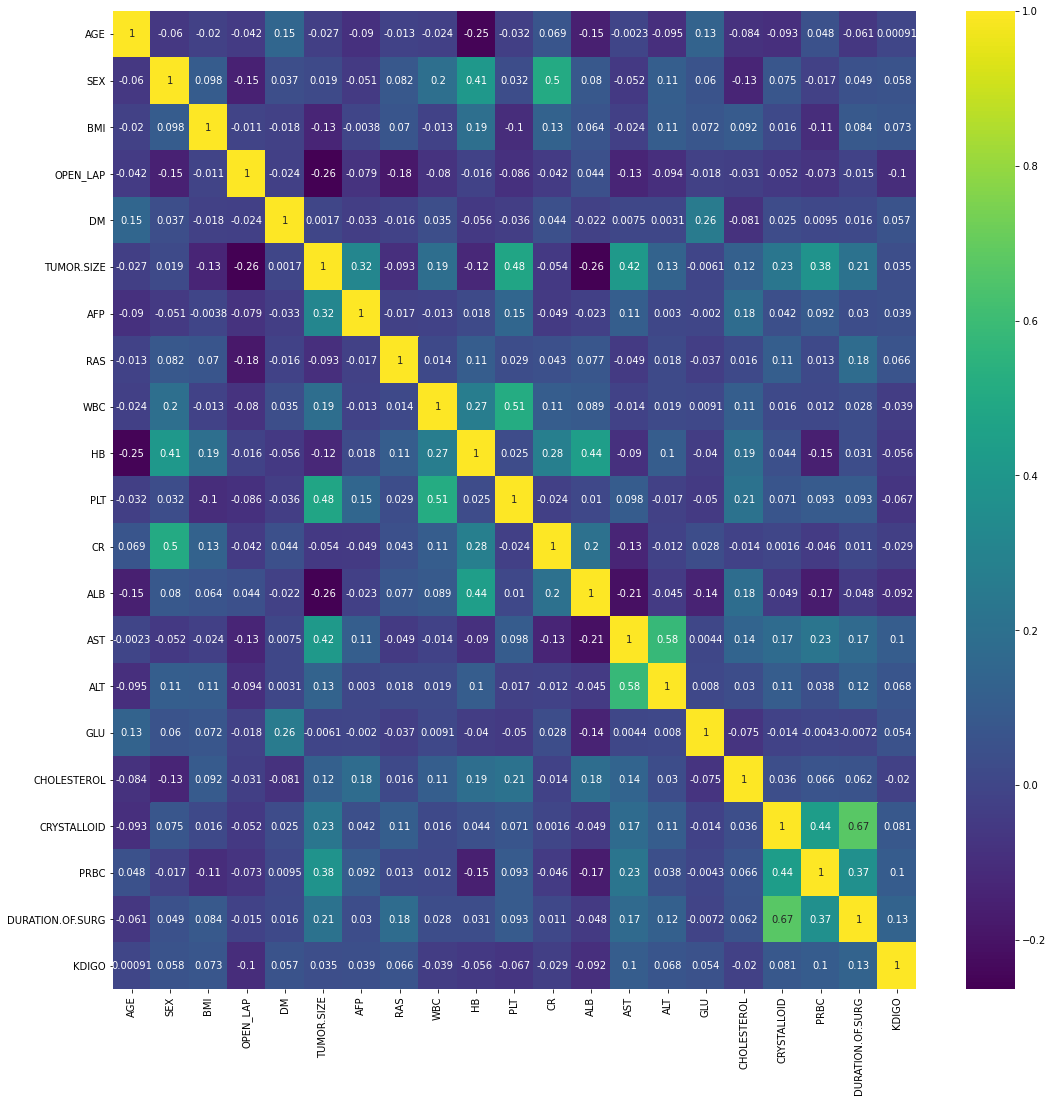

In [ ]:
plt.figure(figsize=(18,18))
sns.heatmap(df_processed.corr(), annot=True, cmap="viridis")

In [ ]:
filepath = os.path.join(data_path, "AKI_Original.xlsx")
#df_complete = pd.read_csv(filepath, na_values=['NA','?','-'])
df_complete = pd.read_excel(filepath, engine = 'xlrd')

In [ ]:
df_complete.isnull().sum()

Op_date_categorical    0
Open_Lap               0
Age                    0
Sex_FM                 0
BMI                    0
                      ..
NLR_max7               0
WBC_47                 0
NLR_47                 0
WBC_03                 0
NLR_03                 0
Length: 71, dtype: int64

In [ ]:
df_complete

,Op_date_categorical,Open_Lap,Age,Sex_FM,BMI,MELD,CTPscore,CTPgr,DM,HTN,CAD,CVA,tumor size,aFP,Minor_Major_New,SugeryType,RL,LL,RPS,RAS,PH,WBC,Hb,Plt,PT_INR,Cr,Alb,TB,AST,ALT,Na,K,Cl,Glu,Cholesterol,Crystalloid,Syn_Col,Syn_OX,Alb_5%,Alb5_OX,Alb_20%,Alb20_OX,AnyAlbOX,pRBC,FFP,PC,Transfusion_OX,U/O,Duration of Surg,WBCMAX7,Hospital stay,Vasopressor,KDIGO,KDIGOgr,POD90Cr,POD90Cr_POD,ayearCr,CRF_MDRD,CRF stage,ICU stay,ICUadm_OX,TBD_Column,Survival day,WBC_Pre,NLR_Pre,WBC_max7,NLR_max7,WBC_47,NLR_47,WBC_03,NLR_03
0,4,0,64,0,23.3,7,5,1,0,0,0,0,1.2,193.00,0,8,0,0,0,0,0,4.1,12.9,113,1.07,0.70,3.7,0.8,36,35,139,3.5,109,128,197,1800,300,1,0,0,0,0,0,0,0.0,0,0,1150,214,17.9,14,0,0,0,0.61,80.0,0.75,0,0,0,0,0,1621,4.1,1.417827,17.9,19.800000,9.3,3.569948,17.9,19.800000
1,8,0,57,1,28.9,6,5,1,0,0,0,0,1.5,6.10,1,1,1,0,0,0,0,5.2,14.1,140,0.99,1.00,4.0,0.7,25,24,141,4.2,105,111,125,500,100,1,0,0,0,0,0,0,0.0,0,0,245,240,12.6,19,0,0,0,0.87,15.0,0.94,0,0,0,0,0,269,5.2,1.500000,12.6,19.777778,6.3,1.830935,12.6,19.777778
2,4,0,45,1,29.7,8,5,1,0,0,0,0,1.7,1120.00,1,3,0,0,1,0,0,4.5,16.4,100,1.11,0.90,4.6,1.2,30,29,138,3.5,106,91,146,3100,800,1,0,0,0,0,0,0,0.0,0,0,560,287,12.2,22,0,1,1,1.09,113.0,1.06,0,0,0,0,0,1598,4.5,1.517615,12.2,22.700000,5.9,3.584699,12.2,22.700000
3,7,0,57,1,23.8,13,7,2,0,0,0,0,6.6,16.00,1,1,1,0,0,0,0,5.9,11.1,320,1.27,0.52,3.0,2.8,52,48,135,4.1,96,138,93,1250,0,0,0,0,0,0,0,0,0.0,0,0,305,260,9.7,16,0,0,0,0.95,26.0,0.90,0,0,0,0,0,409,5.9,2.275862,9.7,14.566667,9.7,2.683983,9.4,14.566667
4,1,0,51,1,23.6,7,5,1,1,0,0,0,NaN,68.70,0,9,0,0,0,0,0,5.0,15.1,130,1.07,0.90,3.9,1.0,29,34,140,4.1,103,238,199,1800,400,1,0,0,0,0,0,0,0.0,0,0,260,186,12.1,107,0,0,0,0.90,31.0,1.00,0,0,0,0,0,2565,5.0,1.252475,12.1,25.171429,5.8,2.367273,12.1,25.171429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1168,8,1,44,1,25.0,7,5,1,0,0,0,0,2.2,0.87,0,9,0,0,0,0,0,4.9,14.3,135,1.04,0.84,3.9,0.6,20,14,141,4.4,105,96,125,2200,0,0,0,0,0,0,0,0,0.0,0,0,185,246,12.5,16,0,0,0,0.96,3.0,0.89,0,0,0,0,0,352,4.9,1.564815,12.5,37.720000,5.8,2.624390,12.5,37.720000
1169,8,1,57,1,23.5,6,5,1,0,0,0,0,2.3,3.50,0,7,0,0,0,0,0,5.9,14.9,132,0.94,0.69,3.7,0.3,31,40,139,4.2,103,142,151,750,400,1,0,0,0,0,0,0,0.0,0,0,230,199,14.0,16,0,0,0,0.74,10.0,0.83,0,0,0,0,0,185,5.9,1.432203,14.0,15.830189,6.8,4.130435,14.0,15.830189
1170,8,1,49,1,21.4,7,5,1,0,0,0,0,1.8,2.90,0,7,0,0,0,0,0,6.8,14.6,202,0.98,1.03,4.8,0.6,19,11,139,4.6,102,95,141,1400,0,0,0,0,0,0,0,0,0.0,0,0,295,161,14.5,52,0,0,0,0.88,9.0,0.97,0,0,0,0,0,161,6.8,1.598240,14.5,36.769231,0.0,0.000000,14.5,36.769231
1171,7,1,43,1,26.6,7,5,1,0,0,0,0,NaN,NaN,0,10,0,0,0,0,0,7.0,16.0,204,0.97,0.90,3.9,1.1,19,17,141,4.1,106,91,167,1000,300,1,0,0,0,0,0,0,0.0,0,0,80,164,14.1,25,0,0,0,0.89,123.0,0.96,0,0,0,0,0,506,7.0,1.009346,14.1,7.528302,8.6,2.495763,14.1,7.528302


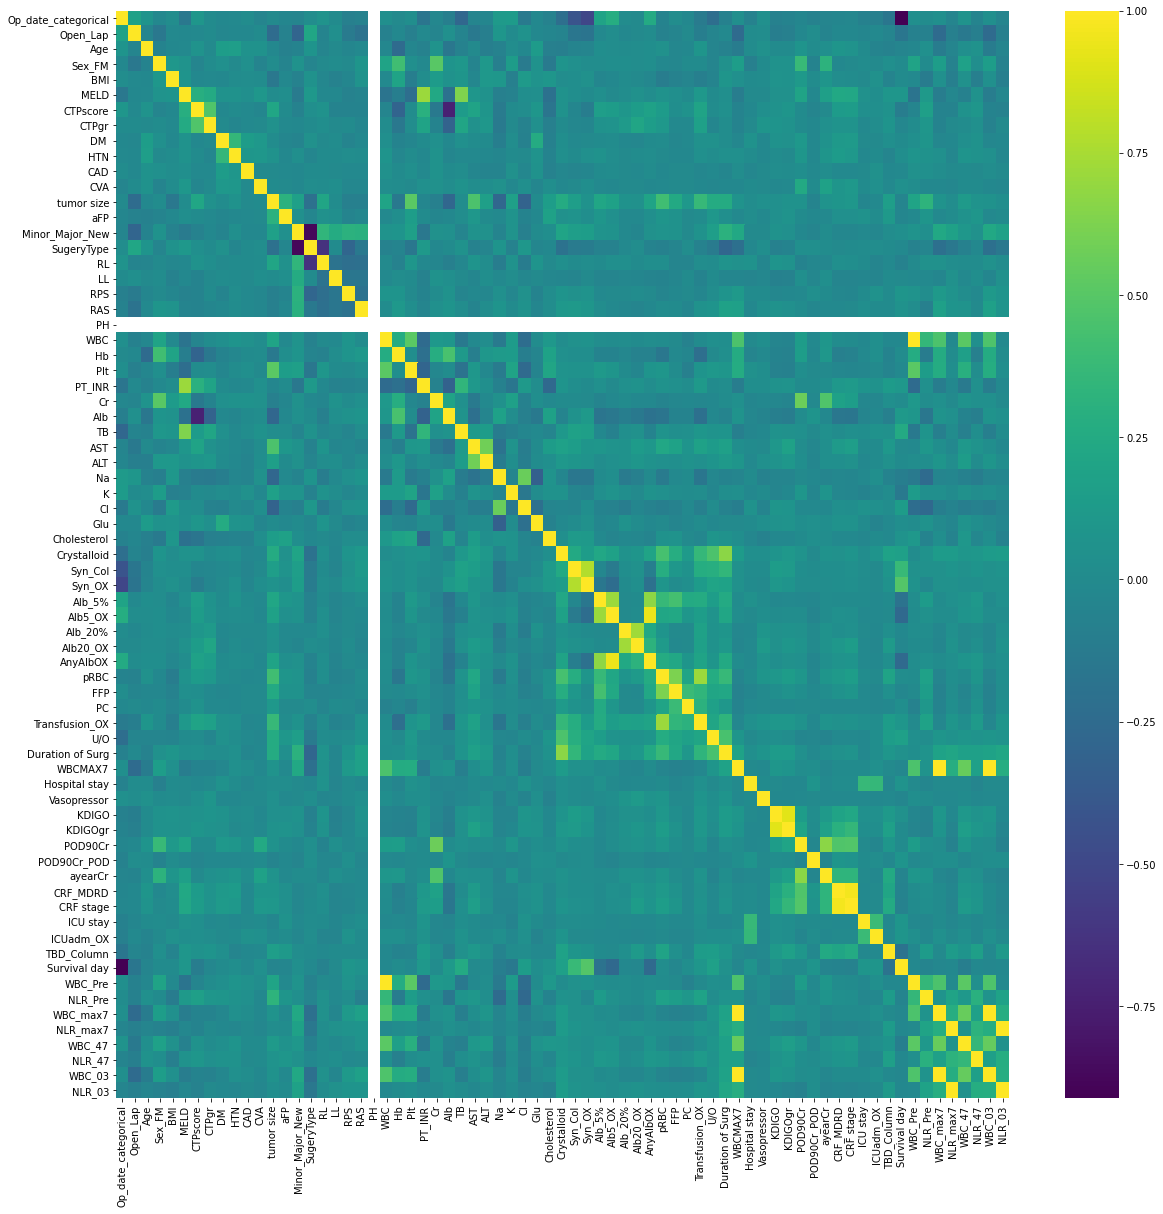

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(df_complete.corr(), cmap="viridis")

In [ ]:
correlation = df_complete.corr()
correlation['KDIGO'].sort_values(ascending=False)

KDIGO                  1.000000
KDIGOgr                0.915313
CRF stage              0.225448
CRF_MDRD               0.196918
POD90Cr                0.136169
                         ...   
SugeryType            -0.078336
Op_date_categorical   -0.081024
Alb                   -0.092438
Open_Lap              -0.103122
PH                          NaN
Name: KDIGO, Length: 71, dtype: float64